In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from tqdm import tqdm 
tqdm.pandas()

import statsmodels.formula.api as smf
import numpy as np

from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Import Mobility Data

In [2]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [3]:
combined['StateCD'] = combined['State Code'] 

In [4]:
combined.shape

(1010990, 69)

In [5]:
combined.County_FIPS.unique().shape

(3130,)

## County Population Descriptions 

In [6]:
countylevel = combined.groupby("County_FIPS").max()

In [7]:
countylevel.Population_ACS.describe()

count       3130.00
mean      101277.47
std       327566.91
min           74.00
25%        10945.25
50%        25677.00
75%        66945.75
max     10105722.00
Name: Population_ACS, dtype: float64

In [8]:
plt.style.use('fivethirtyeight')

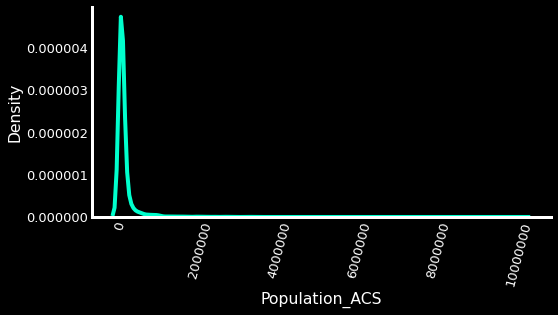

In [9]:
plt.rcParams.update({'font.size': 13})
plt.style.use("dark_background") 
sns.set_style({'axes.grid' : False})
sns.displot(countylevel.Population_ACS, height=4, aspect=1.8, color="#00ffcd", kind="kde")
plt.xticks(rotation=75)
plt.ticklabel_format(useOffset=False, style='plain')

## State Level Description of Deaths Per Capita on 2020-12-01

In [10]:
dec = combined[combined.Date == '2020-12-01']

In [11]:
statelevel = dec.groupby("StateCD").sum()

In [12]:
s2 = statelevel[['Deaths','Population_ACS']].reset_index()
s2['Deaths_PER_100K'] = s2['Deaths']/(s2['Population_ACS']/100000)
s2.sort_values(by="Deaths_PER_100K")

,StateCD,Deaths,Population_ACS,Deaths_PER_100K
45,VT,72,624636.00,11.53
20,ME,214,1330158.00,16.09
0,AK,122,737264.00,16.55
10,HI,242,1421572.00,17.02
43,UT,672,2993941.00,22.45
36,OR,936,4025127.00,23.25
46,WA,2802,7169967.00,39.08
49,WY,230,583200.00,39.44
29,NH,527,1331848.00,39.57
48,WV,758,1836843.00,41.27


In [13]:
yuma = combined[combined['locationcol'] == 'Yuma|Arizona']

In [14]:
yuma.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

In [15]:
## Yuma 

In [16]:
sns.set(rc={'figure.figsize':(5,4)})

In [17]:
yuma1 = yuma[['Date','Deaths_New']]
yuma1.columns = ['Date','Deaths']
yuma1['Type'] = 'Deaths_New'

yuma2 = yuma[['Date','Deaths_New_RollingAvg']]
yuma2.columns = ['Date','Deaths']
yuma2['Type'] = 'Deaths_New_RollingAvg'

yuma3 = pd.concat([yuma1,yuma2])

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
yuma3

,Date,Deaths,Type
35207,2020-01-22,nan,Deaths_New
35208,2020-01-23,0.00,Deaths_New
35209,2020-01-24,0.00,Deaths_New
35210,2020-01-25,0.00,Deaths_New
35211,2020-01-26,0.00,Deaths_New
...,...,...,...
35525,2020-12-05,3.00,Deaths_New_RollingAvg
35526,2020-12-06,2.43,Deaths_New_RollingAvg
35527,2020-12-07,2.43,Deaths_New_RollingAvg
35528,2020-12-08,2.57,Deaths_New_RollingAvg


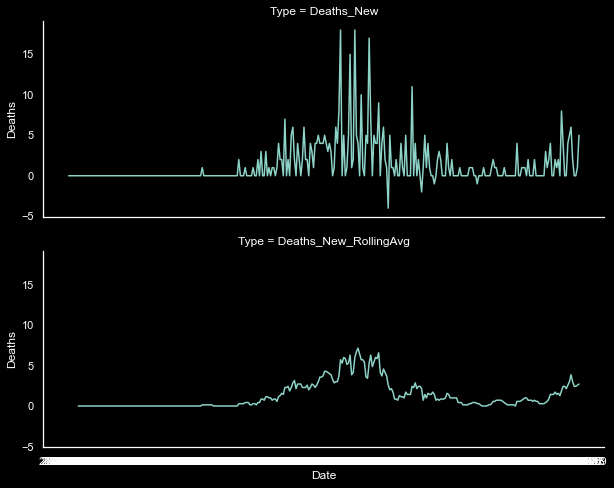

In [19]:
plt.rcParams.update({'font.size': 14})
plt.style.use("dark_background")
sns.set_style({'axes.grid' : False})
g = sns.FacetGrid(yuma3, row="Type",  height=3.5, aspect=2.5)
g.map(sns.lineplot, "Date", "Deaths")

In [20]:
combined_samp = combined.sample(frac=.2)

In [21]:
def regress_two_var(df, X, Y, startdate = "2020-01-01", enddate = "2020-10-01"):
    # Cleaning up the dataframe
    df = df[df.Date >= startdate]
    df = df[df.Date <= enddate]
    df = df[df['{Y}'.format(Y=Y)].isna() == False]
    df = df[df['{X}'.format(X=X)].isna() == False]
    #dataframe["ratio"] = dataframe['{Y}'.format(Y=Y)]/dataframe['{X}'.format(X=X)]
    Xvar =  df['{X}'.format(X=X)].values.reshape(-1, 1) 
    Xvar1 = sm.add_constant(Xvar) # need to do this for statsmodels for some reason
    Yvar = df['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar1)
    res = mod.fit()
    print(res.summary())
    # Graph the regression
    linear_regressor = LinearRegression()  # create object for the class
    fitted_model = linear_regressor.fit(X=Xvar,y=Yvar)  # perform linear regression
    Y_pred = fitted_model.predict(Xvar)  # make predictions
    #return fitted_model
    plt.scatter(y=Yvar, x=Xvar)
    plt.plot(Xvar, Y_pred, color='red')
    plt.title("{X} on {Y} Regression".format(X=X,Y=Y))
    plt.show()
    #Scatterplot to show data
    sns.scatterplot(y='{Y}'.format(Y=Y),x='{X}'.format(X=X), hue="Division", data=df)

In [22]:
combined_oneday = combined[combined['Date']=='2020-10-01']

In [23]:
combined_oneday

,Unnamed: 0,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,...,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division,StateCD
253,253,2020-10-01,01001,AL,Autauga County,5.00,10.00,nan,nan,-18.00,...,12.72,16.35,0.78,0.00,0.00,0.52,0.26,South,East South Central,AL
576,576,2020-10-01,01003,AL,Baldwin County,-3.00,-8.00,4.00,9.00,-23.00,...,13.28,41.03,0.21,0.77,0.14,0.21,0.00,South,East South Central,AL
899,899,2020-10-01,01005,AL,Barbour County,12.00,nan,nan,nan,-16.00,...,22.90,17.45,0.00,1.09,0.00,0.00,0.00,South,East South Central,AL
1222,1222,2020-10-01,01007,AL,Bibb County,nan,nan,nan,nan,-14.00,...,13.29,15.82,0.00,1.27,0.63,0.63,0.63,South,East South Central,AL
1545,1545,2020-10-01,01009,AL,Blount County,1.00,7.00,nan,nan,-21.00,...,13.87,7.43,0.00,0.25,1.73,0.50,0.00,South,East South Central,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009628,1009628,2020-10-01,56037,WY,Sweetwater County,-8.00,nan,nan,37.00,-16.00,...,6.74,4.49,0.00,0.00,0.00,0.00,0.00,West,Mountain,WY
1009951,1009951,2020-10-01,56039,WY,Teton County,13.00,nan,nan,-20.00,-22.00,...,61.07,38.64,0.00,0.00,0.00,0.00,0.00,West,Mountain,WY
1010274,1010274,2020-10-01,56041,WY,Uinta County,14.00,nan,nan,41.00,-17.00,...,-4.82,6.19,0.00,0.00,0.00,0.00,0.69,West,Mountain,WY
1010597,1010597,2020-10-01,56043,WY,Washakie County,nan,nan,nan,nan,-10.00,...,0.00,5.19,0.00,0.00,1.73,0.00,0.00,West,Mountain,WY


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     18.89
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.53e-05
Time:                        18:39:45   Log-Likelihood:                -4597.0
No. Observations:                 990   AIC:                             9198.
Df Residuals:                     988   BIC:                             9208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2637      2.177     -7.013      0.0

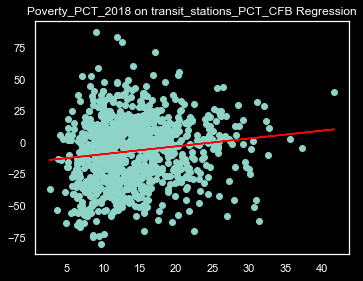

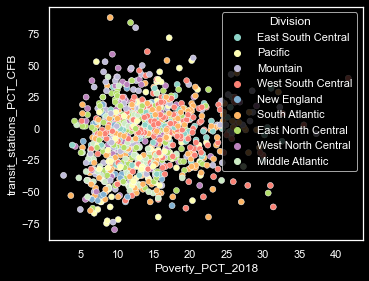

In [24]:
regress_two_var(df=combined_oneday,X="Poverty_PCT_2018",Y="transit_stations_PCT_CFB")

In [25]:
def multivariate_ols(input_df, Y, Xlist):
    # Reshape the df to avoid NAs
    dataframe = input_df
    dataframe = dataframe[dataframe['{Y}'.format(Y=Y)].isna() == False]
    # Clean out any rows where one of these is NA -- can lead to data loss
    for i in Xlist:
        dataframe = dataframe[dataframe[i].isna() == False]
    # Check to ensure not too much thrown away
    pct_preserved = dataframe.shape[0]/input_df.shape[0]
    print("{pct} percent of the data preserved as non-NA".format(pct = 100*round(pct_preserved,2)))
    Xvar =  dataframe[Xlist]#.values.reshape(-1, len(Xlist)) 
    Xvar = sm.add_constant(Xvar)
    Yvar = dataframe['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar,)
    res = mod.fit()
    print(res.summary())
    return res

In [26]:
Xlist = ['HS_DIPLOMA_ONLY_2018',"Poverty_PCT_2018","Median_Income_2018","SOME_COLLEGE_2018"]

multivariate_ols(input_df=combined, Y="workplaces_PCT_CFB", Xlist=Xlist)

70.0 percent of the data preserved as non-NA
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                 1.565e+04
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:39:47   Log-Likelihood:            -2.8743e+06
No. Observations:              704491   AIC:                         5.749e+06
Df Residuals:                  704486   BIC:                         5.749e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [27]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

In [28]:
combined['StateCD'] = combined['State Code'] 

## Define list of all candidate predictors and then the possible outcomes

In [29]:
full_predictors = [
 'C(Metro)',
 #'HS_DIPLOMA_ONLY_2018',
 'PCT_Black_ACS',
 'BACHELORS_PLUS_2018',
 'Confirmed_New_RollingAvg_PER_100K',
 #'workplaces_PCT_CFB',
 'residential_PCT_CFB_RollingAvg',
 'Poverty_PCT_2018',
 'Median_Income_2018',
 #'C(Region)',
 'C(StateCD)',
    
]

Ylist = [#'Deaths_New_7_RollingAvg_PER_100K',
         #'Deaths_New_14_RollingAvg_PER_100K',
         #'Deaths_New_28_RollingAvg_PER_100K',
         #'Deaths_PER_100K'
         'Deaths_New_RollingAvg_PER_100K'
            ]

## Create list of formulas for all combinations

In [30]:
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return set(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))

ps = powerset(full_predictors)
ps_list = [list(i) for i in ps]

In [31]:
textlist = []

for i in ps_list:
    text = '|'
    for x in i:
        text = text+' + '+x
    textlist.append(text)


textlist = [i.replace('| +','') for i in textlist if len(i) > 3]
    
full_form_list = []
for i in textlist:
    for y in Ylist:
        full_form_list.append(y+" ~ "+i)


full_form_list
samp_list = full_form_list[0:50]

In [32]:
len(full_form_list) # Number of the possible equations

255

## Define a Function for Formula-Based OLS

In [33]:
def start_end_mulivariate_ols(formulatxt, startdate="2020-06-01", enddate="2020-12-09", df=combined):
    segmented = df[df.Date > startdate]
    segmented = segmented[segmented.Date < enddate]
    mod = smf.ols(formula=formulatxt , data=segmented, missing='drop')
    res = mod.fit()
    #print(res.summary())
    return res

In [34]:
mod1 = start_end_mulivariate_ols(startdate = "2020-07-01", enddate = "2020-10-07", formulatxt="""
Deaths_PER_100K ~  residential_PCT_CFB_RollingAvg""")
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3038.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:39:48   Log-Likelihood:            -4.1917e+05
No. Observations:               80920   AIC:                         8.384e+05
Df Residuals:                   80918   BIC:                         8.384e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Test Formula for OLS

In [35]:
mod1 = start_end_mulivariate_ols(startdate = "2020-10-01", enddate = "2020-10-07", formulatxt="""
Deaths_New_RollingAvg_PER_100K ~ HS_DIPLOMA_ONLY_2018 + residential_PCT_CFB_RollingAvg +
Poverty_PCT_2018 + Median_Income_2018 + C(Region)""")

In [36]:
# Construct monthly daterange tuples

every_month = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    every_month.append((a,b))
every_month.append(('2020-09-01','2020-10-01'))
every_month.append(('2020-10-01','2020-11-01'))
for i in range(10,12):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
every_month.append((a,b))
every_month

[('2020-04-01', '2020-05-01'),
 ('2020-05-01', '2020-06-01'),
 ('2020-06-01', '2020-07-01'),
 ('2020-07-01', '2020-08-01'),
 ('2020-08-01', '2020-09-01'),
 ('2020-09-01', '2020-10-01'),
 ('2020-10-01', '2020-11-01'),
 ('2020-11-01', '2020-12-01')]

In [37]:
every_3month =[
 ('2020-04-01', '2020-07-01'),
 ('2020-05-01', '2020-08-01'),
 ('2020-06-01', '2020-09-01'),
 ('2020-07-01', '2020-10-01'),
 ('2020-08-01', '2020-11-01'),
 ('2020-09-01', '2020-12-01')
]


In [38]:
#dir(mod1)

## Function for running model and then graphing it over the different dateranges

In [39]:
def run_timeseries_models(formulatxt, list_dateranges, df):
    list_results = []
    for i in list_dateranges:
        res = start_end_mulivariate_ols(formulatxt = formulatxt, startdate = i[0], enddate = i[1], df=df)
        name = i[0]+"-"+i[1]
        list_results.append({"model":res,"start":i[0], "end":i[1]})
    
    resultslist = [{"bic":i['model'].bic, 
                    "aic":i['model'].aic, 
                    "start":i['start'], 
                    "end":i['end'], 
                    "r2_adj":i["model"].rsquared_adj,
                    "formula":formulatxt} for i in list_results]
    return pd.DataFrame.from_dict(resultslist)
    
    
    
    

In [40]:
formulatxt = "Deaths_New_21_RollingAvg_PER_100K ~  residential_PCT_CFB_RollingAvg + C(StateCD)"

df = run_timeseries_models(formulatxt=formulatxt, list_dateranges=every_month, df=combined)

In [41]:
df

,bic,aic,start,end,r2_adj,formula
0,27644.38,27247.75,2020-04-01,2020-05-01,0.50,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
1,11514.85,11111.17,2020-05-01,2020-06-01,0.26,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
2,9613.71,9207.70,2020-06-01,2020-07-01,0.23,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
3,15090.24,14683.00,2020-07-01,2020-08-01,0.35,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
4,13758.06,13343.74,2020-08-01,2020-09-01,0.22,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
5,14646.03,14230.01,2020-09-01,2020-10-01,0.15,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
6,41431.05,41003.90,2020-10-01,2020-11-01,0.16,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
7,34900.15,34502.44,2020-11-01,2020-12-01,0.23,Deaths_New_21_RollingAvg_PER_100K ~ residenti...


## Run model and return dataframe showing the BIC, AIC, and R Squared

In [42]:
def graph_bic_adj2_TS(formulatxt, list_dateranges, df):
    df_graph = run_timeseries_models(formulatxt=formulatxt, list_dateranges=list_dateranges, df=df)
    plt.figure(figsize=(12,6))
    ax = sns.lineplot(x="start", y="bic", label="BIC", data=df_graph)
    plt.legend(loc="upper right")
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="start", y="r2_adj", label="R2_ADJ", color='red', data=df_graph)
    plt.title("BIC vs R2_ADJ")
    plt.legend(loc="upper left")
    print(formulatxt)
    print()

In [96]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

Deaths_PER_100K ~ Poverty_PCT_2018 + StateCD + Metro + PCT_Black_ACS



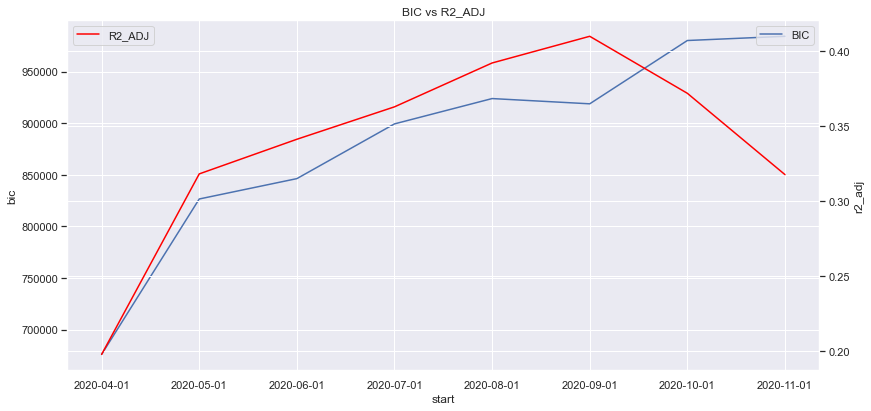

In [106]:
formula1 = """Deaths_PER_100K ~ Poverty_PCT_2018 + StateCD + Metro + PCT_Black_ACS"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

In [107]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-12-01", formulatxt= formula1)
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     3785.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:22:55   Log-Likelihood:            -2.9658e+06
No. Observations:              569478   AIC:                         5.932e+06
Df Residuals:                  569422   BIC:                         5.932e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + StateCD



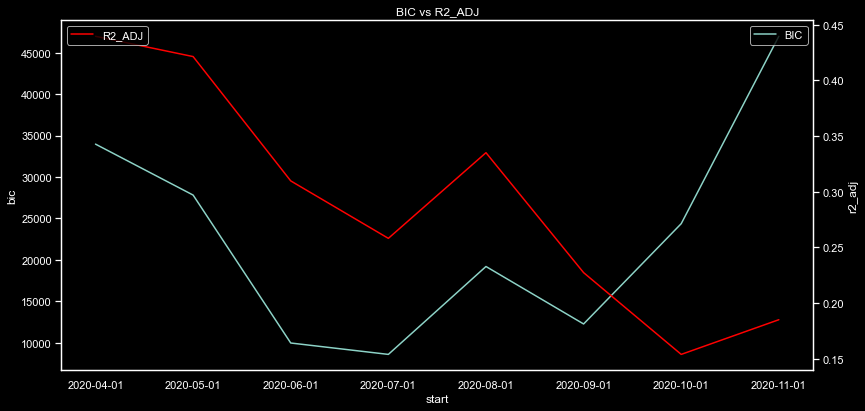

In [43]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + StateCD"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Metro



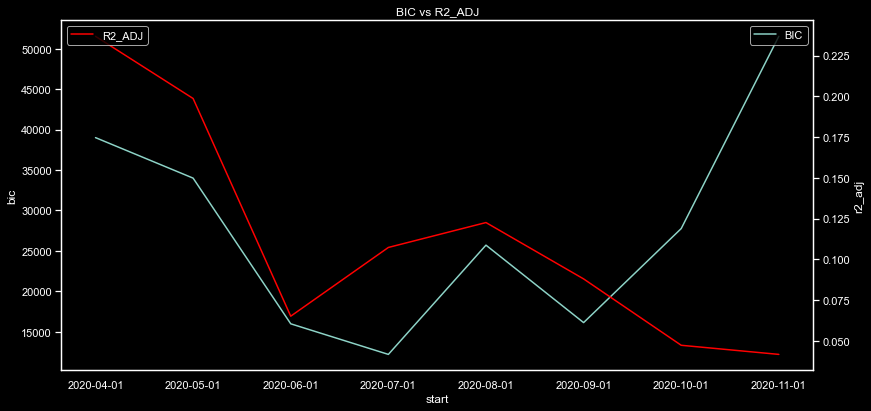

In [44]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Metro"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

## List of all possible formulas for OLS 

In [45]:
full_form_list[0:5]

['Deaths_New_RollingAvg_PER_100K ~  PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + C(StateCD)',
 'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD)',
 'Deaths_New_RollingAvg_PER_100K ~  PCT_Black_ACS + BACHELORS_PLUS_2018 + C(StateCD)',
 'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K',
 'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + Poverty_PCT_2018']

In [46]:
list_df = []
for i in tqdm(full_form_list):
    try:
        df = run_timeseries_models(formulatxt=i, list_dateranges=[('2020-06-01','2020-12-01')], df=combined)
        list_df.append(df)
    except:
        print("Error for {i}".format(i=i))

100%|██████████| 255/255 [13:07<00:00,  3.09s/it]


In [63]:
#list_df

In [64]:
bigdf = pd.concat(list_df)

In [65]:
bigdf['num_var'] = bigdf['formula'].str.count('\+')+1

In [66]:
bigdf.formula.unique()

array(['Deaths_New_RollingAvg_PER_100K ~  PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + C(StateCD)',
       'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD)',
       'Deaths_New_RollingAvg_PER_100K ~  PCT_Black_ACS + BACHELORS_PLUS_2018 + C(StateCD)',
       'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K',
       'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + Poverty_PCT_2018',
       'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + BACHELORS_PLUS_2018',
       'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Median_Income_2018',
       'Deaths_New_Roll

In [94]:
list_forms = list(bigdf.formula.unique())
list_forms =[i for i in list(bigdf['formula'].unique()) if "Confirmed" not in i]


bigdf[bigdf.formula.isin(list_forms)].groupby("formula").mean().sort_values(by="num_var",ascending=True).head(30)

,bic,aic,r2_adj,num_var
formula,,,,
Deaths_New_RollingAvg_PER_100K ~ BACHELORS_PLUS_2018,1674592.86,1674570.35,0.01,1
Deaths_New_RollingAvg_PER_100K ~ Poverty_PCT_2018,1673383.41,1673360.90,0.01,1
Deaths_New_RollingAvg_PER_100K ~ PCT_Black_ACS,1675382.00,1675359.49,0.01,1
Deaths_New_RollingAvg_PER_100K ~ C(Metro),1676851.71,1676795.44,0.00,1
Deaths_New_RollingAvg_PER_100K ~ Median_Income_2018,1673673.87,1673651.37,0.01,1
Deaths_New_RollingAvg_PER_100K ~ C(StateCD),1663806.18,1663243.54,0.03,1
Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg,186366.94,186346.96,0.00,1
Deaths_New_RollingAvg_PER_100K ~ Poverty_PCT_2018 + Median_Income_2018,1672839.57,1672805.81,0.01,2
Deaths_New_RollingAvg_PER_100K ~ PCT_Black_ACS + residential_PCT_CFB_RollingAvg,185269.30,185239.33,0.01,2


Text(0.5, 1.0, 'Adjusted R Squared vs BIC')

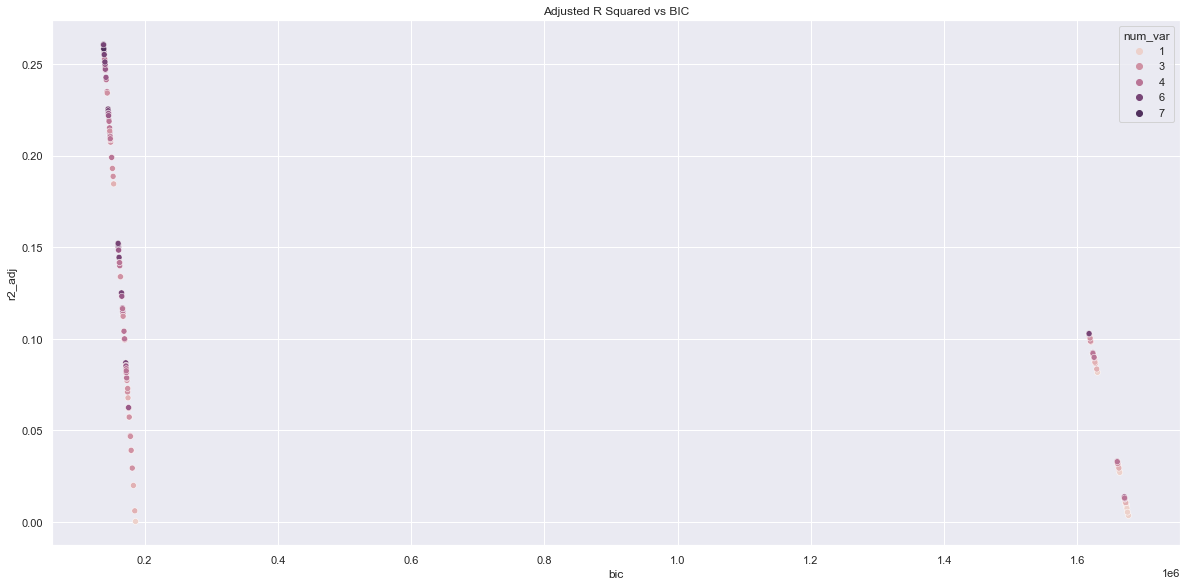

In [77]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,9))
sns.scatterplot(y="r2_adj", x="bic", hue="num_var", data=bigdf)
plt.title("Adjusted R Squared vs BIC")


Deaths_New_RollingAvg_PER_100K ~ C(Metro) + BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg + C(StateCD)


                                  OLS Regression Results                                  
Dep. Variable:     Deaths_New_RollingAvg_PER_100K   R-squared:                       0.136
Model:                                        OLS   Adj. R-squared:                  0.136
Method:                             Least Squares   F-statistic:                     414.6
Date:                            Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                                    19:01:00   Log-Likelihood:                -60307.
No. Observations:                          144378   AIC:                         1.207e+05
Df Residuals:                              144322   BIC:                         1.213e+05
Df Model:                                      55                                         
Covariance Type:                        nonrobust                   

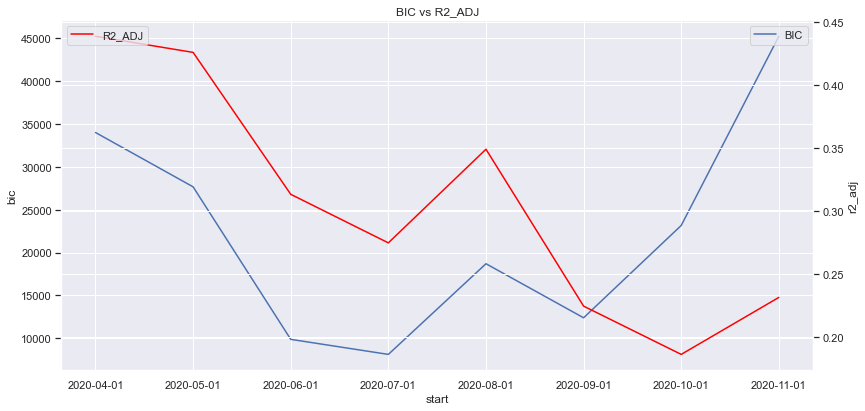

In [88]:
formula1 = """
Deaths_New_RollingAvg_PER_100K ~ C(Metro) + BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg + C(StateCD)
"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-11-15', df= combined)
print(mod2.summary())

Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + C(StateCD)

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3914.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:00:15   Log-Likelihood:            -2.6617e+06
No. Observations:              519414   AIC:                         5.324e+06
Df Residuals:                  519358   BIC:                         5.324e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

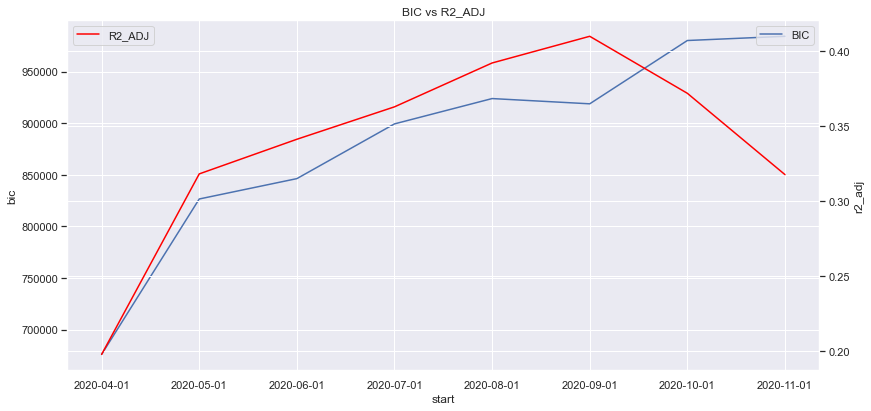

In [79]:
formula1 = """Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + C(StateCD)"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-11-15', df= combined)
print(mod2.summary())

In [80]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

## Detecting and managing multicolinearity 

In [81]:
#Sources: https://etav.github.io/python/vif_factor_python.html
        # https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/ 

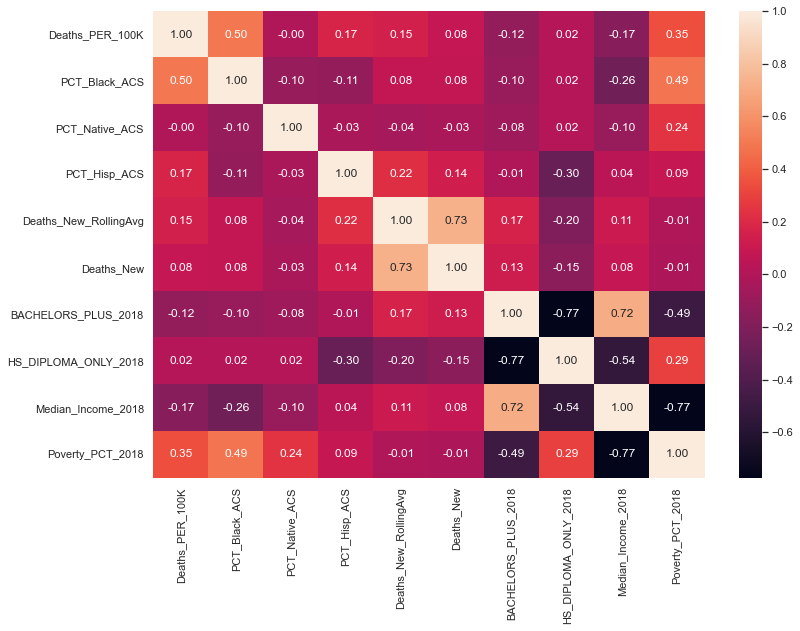

In [82]:
#https://etav.github.io/python/vif_factor_python.html

combined_1day = combined[combined.Date == "2020-10-08"]


cols_subset = ["Deaths_PER_100K","Metro","PCT_Black_ACS",'PCT_Native_ACS',"PCT_Hisp_ACS", "Deaths_New_RollingAvg", "Deaths_New",
               "BACHELORS_PLUS_2018","HS_DIPLOMA_ONLY_2018", "Median_Income_2018", "Region", #"StateCD",
               "Poverty_PCT_2018" #,"StateCD
              ] 
combined_sub2 = combined_1day[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sub2.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [83]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
#combined_sub2_long = pd.get_dummies(combined_sub2, columns=["Metro","StateCD"])
combined_sub2_long_nona = combined_sub2.dropna()

list_col = list(combined_sub2.columns)
list_col.remove("Deaths_PER_100K")

features = "+".join(list_col)


y, X = dmatrices("Deaths_PER_100K ~"+features, combined_sub2, return_type='dataframe')

In [86]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [87]:
vif.round(1).sort_values(by="VIF Factor", ascending=False).head(50)

,VIF Factor,features
0,342.40,Intercept
15,5.20,Median_Income_2018
13,4.80,BACHELORS_PLUS_2018
16,4.30,Poverty_PCT_2018
14,3.80,HS_DIPLOMA_ONLY_2018
2,3.70,Metro[T.Noncore_adjacent]
1,2.80,Metro[T.Micropolitan]
4,2.60,Metro[T.Smaller_metro]
11,2.30,Deaths_New_RollingAvg
3,2.30,Metro[T.Noncore_remote]
